# 영상처리

In [1]:
# !dir/w
# !pwd

In [2]:
import cv2
import os

video_path = "D:\\kys\\public\\old_scada.mp4"
outer_dir = "D:\\kys\\public\\frames"

# 저장폴더 없으면 생성
os.makedirs(outer_dir, exist_ok=True)

# 비디오 캡처 객체 생성
cap = cv2.VideoCapture(video_path) 

frame_count = 0
while True:
    ret , frame = cap.read() # 두가지 값 리턴
    if not ret: break
    #프레임 파일명 지정
    frame_filename = os.path.join(outer_dir, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_filename, frame)
    frame_count += 1

cap.release()
print(f"총 {frame_count}개의 프레임을 추출하였습니다.")


총 1337개의 프레임을 추출하였습니다.


첫프레임 출력성공


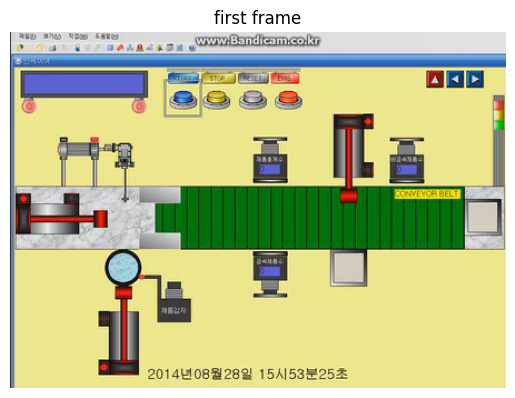

(320, 446, 3)


In [14]:
# 첫프레임 출력
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(video_path)
ret , frame = cap.read()
if ret:
    print("첫프레임 출력성공")
    # print(frame)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
    plt.imshow(rgb)
    plt.title("first frame")
    plt.axis("off")
    plt.show()
    print(frame.shape)
cap.release()

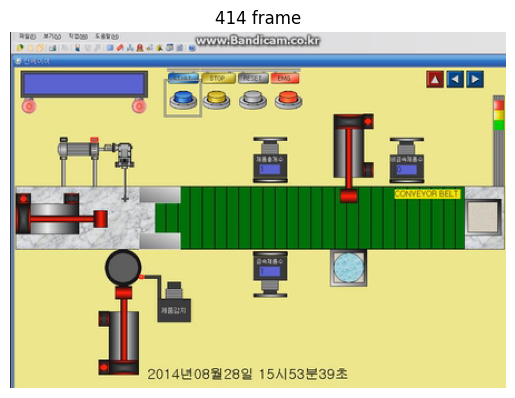

In [15]:
# 특정 프레임 이동 후 저장
cap = cv2.VideoCapture(video_path)
position = 414
cap.set(cv2.CAP_PROP_POS_FRAMES, position)
ret , frame = cap.read()
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cap.release()

cv2.imwrite("D:\\kys\\public\\frame_choice.jpg", frame)
plt.imshow(rgb)
plt.title(f"{position} frame")
plt.axis("off")
plt.show()

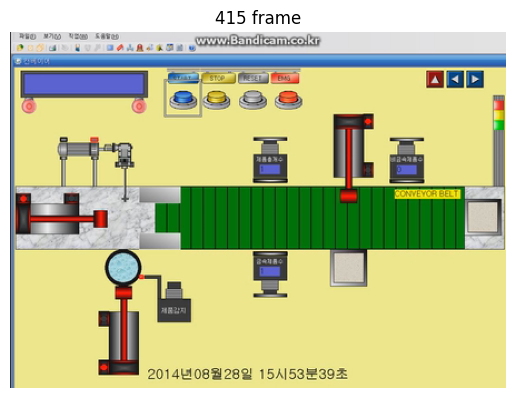

In [5]:
# 특정 프레임 이동 후 저장
cap = cv2.VideoCapture(video_path)
position = 415
cap.set(cv2.CAP_PROP_POS_FRAMES, position)
ret , frame = cap.read()
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cap.release()

cv2.imwrite("D:\\kys\\public\\frame_choice2.jpg", frame)
plt.imshow(rgb)
plt.title(f"{position} frame")
plt.axis("off")
plt.show()

In [6]:
print("프레임크기", frame.shape)

프레임크기 (320, 446, 3)


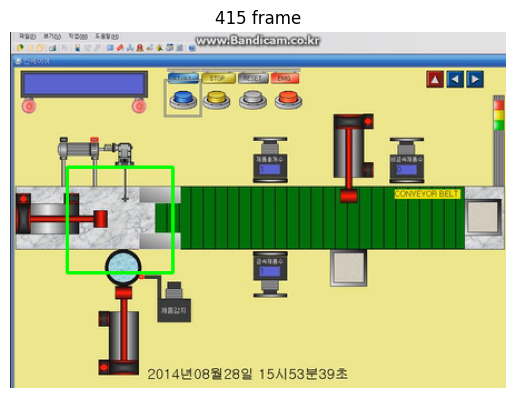

In [7]:
# ROI 정의 ( x, y, w, h) -> (왼쪽에서 픽셀, 위에서 아래로 픽셀, ROI의 가로길이, ROI의 세로길이)
cap = cv2.VideoCapture(video_path)
roi = (51, 121, 95, 95)
x , y , w, h = roi
cv2.rectangle(frame , (x , y), (x + w, y + h),(0, 255, 0), 2) # 화면에다가 사각형 모양의 ROI 삽입, 초록색 , 굵기는 2

rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cap.release()
plt.imshow(rgb)
plt.title(f"{position} frame")
plt.axis("off")
plt.show()

In [12]:
import os
import cv2

roi_dir = "D:\\kys\\public\\frame_ROI"

os.makedirs(roi_dir, exist_ok=True)

# ROI 정의 ( x, y, w, h) -> (왼쪽에서 픽셀, 위에서 아래로 픽셀, ROI의 가로길이, ROI의 세로길이)
cap = cv2.VideoCapture(video_path)
roi1 = (51, 121, 95, 95)
roi2 = (208, 90, 212 ,150)
x1 , y1 , w1, h1 = roi1
x2 , y2 , w2, h2 = roi2

frame_count = 0
while True:
    ret , frame = cap.read()
    if not ret:
        break
    cv2.rectangle(frame , (x1 , y1), (x1 + w1, y1 + h1),(0, 255, 0), 2) # 화면에다가 사각형 모양의 ROI 삽입, 초록색 , 굵기는 2
    cv2.rectangle(frame , (x2 , y2), (x2 + w2, y2 + h2),(0, 0, 255), 1) # 화면에다가 사각형 모양의 ROI 삽입, 빨간색 , 굵기는 2

    roi_filename = os.path.join(roi_dir, f"frame_ROI_{frame_count:04d}.jpg" )
    cv2.imwrite(roi_filename,frame)
    frame_count += 1
cap.release()
print(f"총 {frame_count}개의 프레임을 ROI 마킹하여 저장하였습니다.")
# rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# cap.release()
# plt.imshow(rgb)
# plt.title(f"{position} frame")
# plt.axis("off")
# plt.show()

총 1337개의 프레임을 ROI 마킹하여 저장하였습니다.


In [13]:
import os
import cv2

roi_dir = "D:\\kys\\public\\frame_ROI"

roi1_dir = os.path.join(roi_dir, "ROI1" )
roi2_dir = os.path.join(roi_dir, "ROI2" )

os.makedirs(roi_dir, exist_ok=True)
os.makedirs(roi1_dir, exist_ok=True)
os.makedirs(roi2_dir, exist_ok=True)

# ROI 정의 ( x, y, w, h) -> (왼쪽에서 픽셀, 위에서 아래로 픽셀, ROI의 가로길이, ROI의 세로길이)
cap = cv2.VideoCapture(video_path)
roi1 = (51, 121, 95, 95)
roi2 = (208, 90, 212 ,150)
x1 , y1 , w1, h1 = roi1
x2 , y2 , w2, h2 = roi2

frame_count = 0
while True:
    ret , frame = cap.read()
    if not ret:
        break

    # ROI 마킹포함 전체 프레임    
    cv2.rectangle(frame , (x1 , y1), (x1 + w1, y1 + h1),(0, 255, 0), 2) # 화면에다가 사각형 모양의 ROI 삽입, 초록색 , 굵기는 2
    cv2.rectangle(frame , (x2 , y2), (x2 + w2, y2 + h2),(0, 0, 255), 1) # 화면에다가 사각형 모양의 ROI 삽입, 빨간색 , 굵기는 2
    roi_filename = os.path.join(roi_dir, f"frame_ROI_{frame_count:04d}.jpg" )
    cv2.imwrite(roi_filename,frame)

    # ROI1만 크롭해서 저장
    roi1_crop = frame[y1:y1 + h1 , x1:x1 + w1 ] # x와 y의 값이 뒤집어 져있다. -> [y , x] 형태
    roi1_filename = os.path.join(roi1_dir, f"ROI1_{frame_count:04d}.jpg" )
    cv2.imwrite(roi1_filename, roi1_crop)

    # ROI2만 크롭해서 저장
    roi2_crop = frame[y2:y2 + h2 , x2:x2 + w2 ] # x와 y의 값이 뒤집어 져있다. -> [y , x] 형태
    roi2_filename = os.path.join(roi2_dir, f"ROI2_{frame_count:04d}.jpg" )
    cv2.imwrite(roi2_filename, roi2_crop)

    frame_count += 1
cap.release()
print(f"총 {frame_count}개의 ROI 마킹한 프레임과 개별 ROI크롭들을 저장하였습니다.")
# rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# cap.release()
# plt.imshow(rgb)
# plt.title(f"{position} frame")
# plt.axis("off")
# plt.show()

총 1337개의 ROI 마킹한 프레임과 개별 ROI크롭들을 저장하였습니다.
